Unique label vectors in ChestMNIST dataset: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


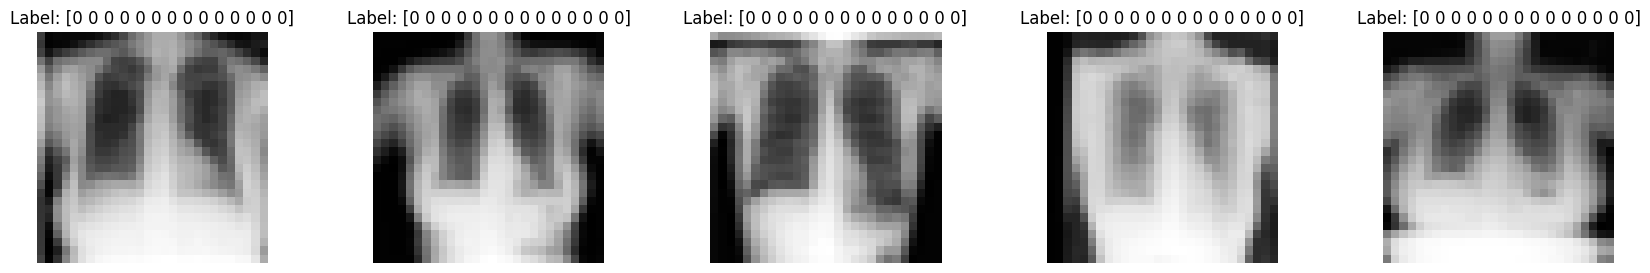

In [6]:
from medmnist import ChestMNIST
import matplotlib.pyplot as plt
import numpy as np

# Load the ChestMNIST dataset
data = ChestMNIST(split='train', download=True)

# Get the labels
labels = data.labels

# Print the unique label vectors
unique_label_vectors = np.unique(labels, axis=0)
print("Unique label vectors in ChestMNIST dataset:", unique_label_vectors)

# Optionally, display some sample images with their labels
fig, axes = plt.subplots(1, 5, figsize=(21, 3))
for i, ax in enumerate(axes):
    img, label = data[i]
    img = np.array(img)  # Convert to numpy array if not already
    ax.imshow(img, cmap='gray')
    ax.set_title(f'Label: {label}')
    ax.axis('off')
plt.show()

Unique label vectors in ChestMNIST dataset: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 ...
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]]


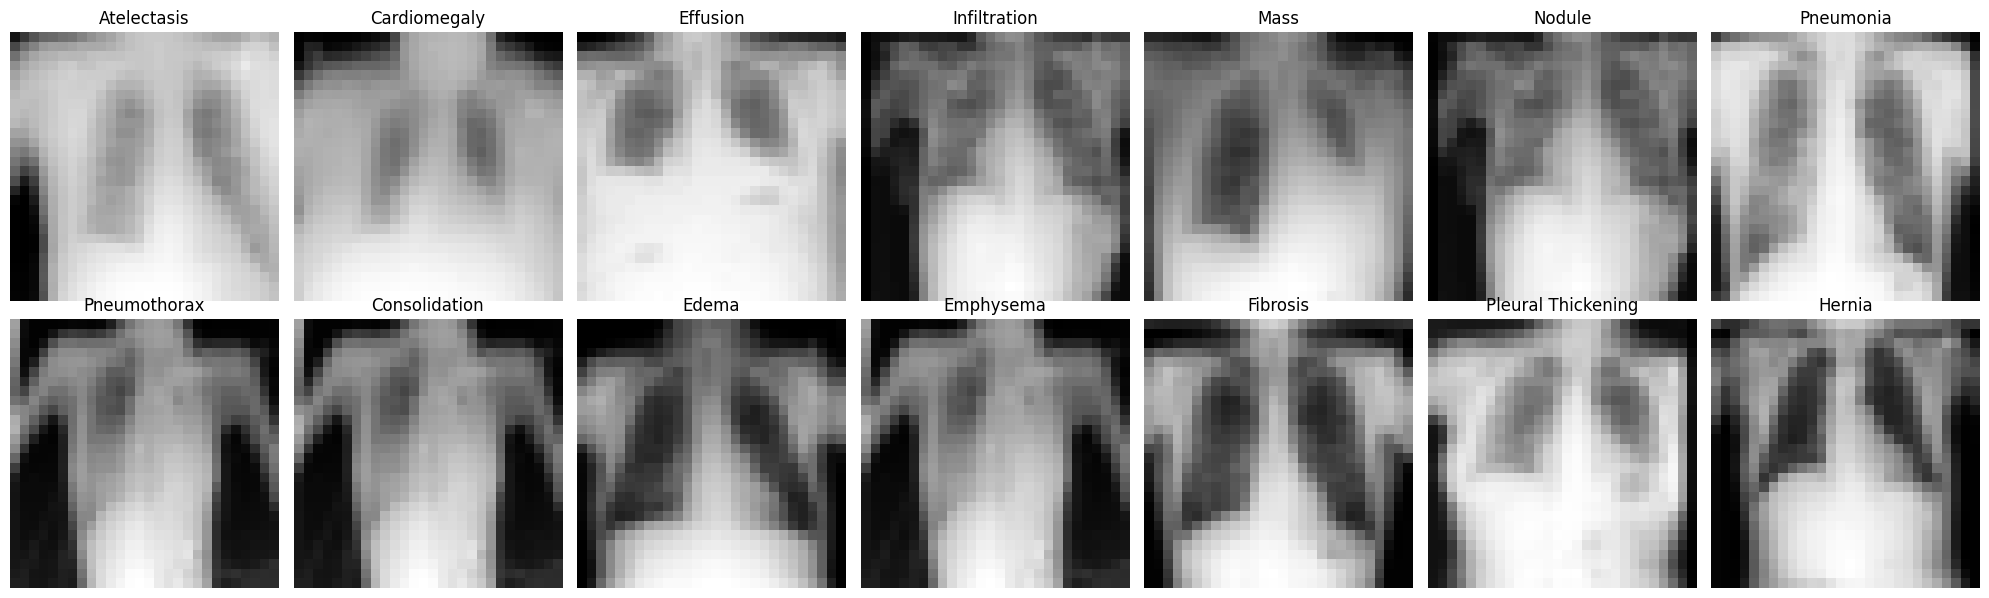

In [5]:
from medmnist import ChestMNIST
import matplotlib.pyplot as plt
import numpy as np

# Load the ChestMNIST dataset
data = ChestMNIST(split='train', download=True)

# Get the labels
labels = data.labels  # Shape: (N, 14) -> Each sample has 14 binary labels

# Print the unique label vectors
unique_label_vectors = np.unique(labels, axis=0)
print("Unique label vectors in ChestMNIST dataset:", unique_label_vectors)

# Define class names (from ChestMNIST documentation)
class_names = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass", 
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema", 
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia"
]

# Visualizing images for each class
fig, axes = plt.subplots(2, 7, figsize=(20, 6))
axes = axes.flatten()

# Store one image per class
found_classes = set()
for img_idx in range(len(data)):
    img, label = data[img_idx]
    label = labels[img_idx]  # Get the corresponding multi-label vector
    label_indices = np.where(label == 1)[0]  # Indices of active classes
    
    for idx in label_indices:
        if idx not in found_classes:  # Ensure one image per class
            found_classes.add(idx)
            axes[idx].imshow(np.array(img), cmap='gray')
            axes[idx].set_title(f"{class_names[idx]}")
            axes[idx].axis("off")
            
    if len(found_classes) == 14:  # Stop once all classes are represented
        break

plt.tight_layout()
plt.show()


In [7]:
from medmnist import ChestMNIST
import numpy as np

# Load the ChestMNIST dataset (training split)
data = ChestMNIST(split='train', download=True)

# Get the labels (Shape: [N, 14] where N is the number of images)
labels = data.labels

# Define class names
class_names = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass", 
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema", 
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia"
]

# Count occurrences of each class
class_counts = labels.sum(axis=0)  # Sum across all samples

# Print the counts per class
for class_name, count in zip(class_names, class_counts):
    print(f"{class_name}: {count} samples")

# Print total number of samples
print(f"\nTotal number of samples in dataset: {labels.shape[0]}")


Atelectasis: 7996 samples
Cardiomegaly: 1950 samples
Effusion: 9261 samples
Infiltration: 13914 samples
Mass: 3988 samples
Nodule: 4375 samples
Pneumonia: 978 samples
Pneumothorax: 3705 samples
Consolidation: 3263 samples
Edema: 1690 samples
Emphysema: 1799 samples
Fibrosis: 1158 samples
Pleural Thickening: 2279 samples
Hernia: 144 samples

Total number of samples in dataset: 78468
